In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler

# https://plotly.com/python/getting-started/#jupyterlab-support
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

pd.options.display.max_columns = None
# Use 'display(df)' instead of 'df' to display all columns.

### Wyciągnięcie filmów z podanymi category_id

#### GB

In [101]:
df = pd.read_csv("./../../data/youtube_data/GB_videos_5p.csv", sep=';', encoding='utf_16')
df = df[["video_id", 'category_id']]
df = df.dropna()
df = df.loc[df.video_id != '#NAZWA?']
df = df.drop_duplicates()

#GB a9esk9m9PqQ - '20': 'Gaming' --> '26': 'Howto & Style' (YT-API - 20)
df.loc[df.video_id == "a9esk9m9PqQ", "category_id"] = 20.0
df = df.drop_duplicates()

df.to_csv("../../our_data/Etap4/GB_videos_with_category.csv", index=False)

#### US

In [102]:
df = pd.read_csv("./../../data/youtube_data/US_videos_5p.csv", sep=';')
df = df[["video_id", 'category_id']]
df = df.dropna()
df = df.loc[df.video_id != '#NAZWA?']
df = df.drop_duplicates()

#US 5Q7mKQmNWSE - '26': 'Howto & Style' --> '28': 'Science & Technology' (YT-API - BRAK)
df.loc[df.video_id == "5Q7mKQmNWSE", "category_id"] = 28.0
df = df.drop_duplicates()
df.to_csv("../../our_data/Etap4/US_videos_with_category.csv", index=False)

### Wizualizacja PCA

In [44]:
mapping = {
    1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [132]:
chosen_columns = [
    'TFIDF_title_clean_17',
    'TFIDF_clean_thumb_ocr_text_V2_17',
    'TFIDF_clean_thumb_ocr_text_V2_27',
    'TFIDF_title_clean_20',
    'TFIDF_title_clean_28',
    'TFIDF_title_clean_27',
    'TFIDF_title_clean_25',
    'TFIDF_title_clean_23',
    'TFIDF_clean_thumb_ocr_text_V2_1',
    'TFIDF_title_clean_22',
    'TFIDF_clean_thumb_ocr_text_V2_25',
    'TFIDF_clean_thumb_ocr_text_V2_22',
    'TFIDF_title_clean_1',
    'TFIDF_clean_thumb_ocr_text_V2_20',
    'TFIDF_title_clean_15',
    'TFIDF_clean_thumb_ocr_text_V2_23',
    'TFIDF_clean_thumb_ocr_text_V2_28',
    'TFIDF_clean_thumb_ocr_text_V2_15',
    'TFIDF_title_clean_10',
    'TFIDF_title_clean_29',
    'channel_title',
]

#### GB

In [130]:
region = 'GB'
df = pd.read_csv(f"./../../our_data/Etap3/{region}_final.csv")

df = df.fillna(-1)
df = df.astype({'category_id': 'int64'})
# df.loc[df.isna().any(axis=1), :]

columns_not_to_standarize = [
#     'channel_title',
    'video_id', 'category_id',
    'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
    'isFacebook', 'isTwitter', 'isInstagram', 
]

df['category_id'] = df['category_id'].map(mapping)

df.loc[:, df.columns.difference(columns_not_to_standarize)] = StandardScaler().fit_transform(df.loc[:, df.columns.difference(columns_not_to_standarize)].values)
df[:3]

video_id  channel_title     category_id     views     likes  dislikes  \
0  -3VBPAZPTQI      -0.504049  People & Blogs -0.247212 -0.255833 -0.130657   
1  -43MBOJnVks       1.244894   Entertainment -0.171068 -0.274211 -0.120152   
2  -5WBCrazSfg       0.735152          Sports -0.255634 -0.295503 -0.136592   

   comment_count  comments_disabled  ratings_disabled  video_error_or_removed  \
0      -0.198684                  0                 0                       0   
1      -0.188244                  0                 0                       0   
2      -0.204043                  0                 0                       0   

   pub_day_of_the_week  pub_month   pub_day  pub_hour  tren_day_of_the_week  \
0             0.792115   1.375283  1.630814  0.346131              1.676179   
1            -0.898555  -0.913671 -0.225963  0.654809             -0.609359   
2            -1.462111   1.146387  1.398717  0.963488             -0.609359   

   tren_month  tren_day  time_to_trend_in_days  dislikes/likes  likes/views  \
0    1.390816  1.843025              -0.127574       -0.125285     0.201039   
1   -0.900998 -0.194960              -0.131575       -0.091034    -0.776027   
2    1.161634  1.603262              -0.128281       -0.127257    -0.505948   

   dislikes/views  comment_count/views  increase_views  increase_likes  \
0       -0.191097            -0.362604       -0.243350       -0.220497   
1       -0.213420            -0.590158        0.533647       -0.065321   
2       -0.266421            -0.380235       -0.264477       -0.236951   

   increase_dislikes  increase_comms  times_in_trend  avg_views  avg_likes  \
0          -0.075250       -0.125811        0.237750  -0.253920  -0.268687   
1          -0.038243       -0.013230       -1.135274  -0.185574  -0.278390   
2          -0.081551       -0.136799       -0.219924  -0.259536  -0.301016   

   avg_dislikes  avg_comms  avg_views_increase_per_hour  n_of_tags  \
0     -0.108072  -0.186847                    -0.284587  -0.457846   
1     -0.100947  -0.169030                    -0.020399   0.845464   
2     -0.112367  -0.191211                    -0.291985   0.926921   

   title_length  title_n_of_words  title_capital_letters  \
0     -0.117333         -0.247930               3.326663   
1     -0.870753         -0.807829               1.570425   
2      0.987682          0.871867              -0.302894   

   title_capital_letters_percent  title_small_letters  \
0                       3.406839            -1.854763   
1                       2.916497            -1.854763   
2                      -0.610233             1.036626   

   title_small_letters_percent  title_punctuation  title_punctuation_percent  \
0                    -2.842685          -0.230791                  -0.205036   
1                    -2.842685           0.299471                   1.097280   
2                     0.403366           1.359995                   0.582078   

   title_n_of_emojis  desc_length  desc_n_of_words  desc_capital_letters  \
0          -0.094291     4.088670         2.229719              3.961638   
1          -0.094291     2.519103         3.075219              1.240735   
2           5.164891    -0.405608        -0.306779             -0.158341   

   desc_capital_letters_percent  desc_small_letters  \
0                      0.533818            3.695191   
1                     -0.253371            2.794801   
2                      0.440630           -0.407406   

   desc_small_letters_percent  desc_punctuation  desc_punctuation_percent  \
0                   -0.311400          2.329471                  0.581969   
1                    0.445677          1.717520                 -0.718312   
2                    0.036979         -0.327685                 -0.317080   

   desc_n_of_urls  desc_n_of_emojis  isFacebook  isTwitter  isInstagram  \
0        5.396526         -0.215998           0          1            1   
1       -0.897846         -0.215998           0          0     

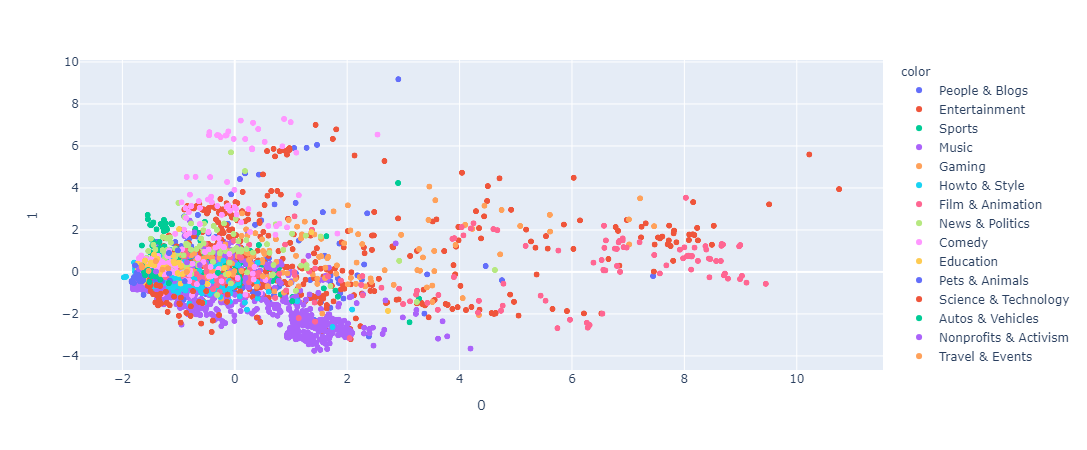

In [131]:
from sklearn import decomposition
import json 
import plotly.express as px

list_of_vecs = df.loc[:, chosen_columns].values

pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(list_of_vecs)

fig = px.scatter(pca_data, x=0, y=1, color=df['category_id'])
fig.show()

#### US

In [128]:
region = 'US'
df = pd.read_csv(f"./../../our_data/Etap3/{region}_final.csv")

df = df.fillna(-1)
df = df.astype({'category_id': 'int64'})
# df.loc[df.isna().any(axis=1), :]

columns_not_to_standarize = [
#     'channel_title',
    'video_id', 'category_id',
    'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
    'isFacebook', 'isTwitter', 'isInstagram', 
]

df['category_id'] = df['category_id'].map(mapping)

df.loc[:, df.columns.difference(columns_not_to_standarize)] = StandardScaler().fit_transform(df.loc[:, df.columns.difference(columns_not_to_standarize)].values)
df[:3]

video_id  channel_title    category_id     views     likes  dislikes  \
0  -0CMnp02rNY       1.088759  Entertainment -0.150159 -0.240069 -0.103614   
1  -0NYY8cqdiQ       1.088759  Entertainment -0.102428 -0.258113 -0.113345   
2  -1Hm41N0dUs      -0.368482         Comedy  0.442988 -0.014986 -0.085388   

   comment_count  comments_disabled  ratings_disabled  video_error_or_removed  \
0      -0.196850                  0                 0                       0   
1      -0.205059                  0                 0                       0   
2      -0.140312                  0                 0                       0   

   pub_day_of_the_week  pub_month   pub_day  pub_hour  tren_day_of_the_week  \
0            -1.425536   0.070622 -1.360584 -0.078969             -0.520799   
1            -1.425536  -1.067118  1.589755  0.075023              0.016858   
2             0.743274  -0.384474  1.353728 -1.002922              1.629830   

   tren_month  tren_day  time_to_trend_in_days  dislikes/likes  likes/views  \
0    0.080724 -1.138438              -0.098094       -0.152527    -0.760893   
1   -0.830254 -1.731353              -0.093555       -0.175734    -0.928577   
2   -0.374765  1.588970              -0.097008       -0.176051    -0.555561   

   dislikes/views  comment_count/views  increase_views  increase_likes  \
0       -0.306167            -0.731549       -0.184781       -0.212923   
1       -0.365658            -0.789508       -0.303970       -0.255462   
2       -0.330929            -0.676615       -0.013641       -0.080622   

   increase_dislikes  increase_comms  times_in_trend  avg_views  avg_likes  \
0          -0.074853       -0.124362       -0.098366  -0.171559  -0.239387   
1          -0.082286       -0.136407       -1.174701  -0.199079  -0.264952   
2          -0.065314       -0.147726       -0.744167   0.080166  -0.067642   

   avg_dislikes  avg_comms  avg_views_increase_per_hour  n_of_tags  \
0     -0.090039  -0.181801                    -0.183651    1.07996   
1     -0.098752  -0.190815                    -0.213787    1.07996   
2     -0.081076  -0.146001                     0.226757    0.25912   

   title_length  title_n_of_words  title_capital_letters  \
0      1.230006          0.643388              -0.094749   
1      1.280782          0.360207              -0.218230   
2      0.163714         -0.206154              -0.341712   

   title_capital_letters_percent  title_small_letters  \
0                      -0.486668             1.550116   
1                      -0.572128             1.747108   
2                      -0.426930             0.565153   

   title_small_letters_percent  title_punctuation  title_punctuation_percent  \
0                     0.713997           0.074678                  -0.324680   
1                     0.874977           0.074678                  -0.335661   
2                     0.718041          -0.530747                  -0.573306   

   title_n_of_emojis  desc_length  desc_n_of_words  desc_capital_letters  \
0           -0.10248    -1.060794        -0.935465             -0.670325   
1           -0.10248    -0.887079        -0.738091             -0.620545   
2           -0.10248     1.299552         1.364380              1.271108   

   desc_capital_letters_percent  desc_small_letters  \
0                     -0.879764           -1.066891   
1                     -0.785120           -0.861661   
2                      0.777352            1.293254   

   desc_small_letters_percent  desc_punctuation  desc_punctuation_percent  \
0                    0.715832         -0.635794                 -1.115851   
1                    0.798775         -0.565282                 -1.138961   
2                   -0.098473          0.686310                 -0.365942   

   desc_n_of_urls  desc_n_of_emojis  isFacebook  isTwitter  isInstagram  \
0       -0.982631         -0.253327           0          0            0   
1       -0.982631         -0.253327           0          0         

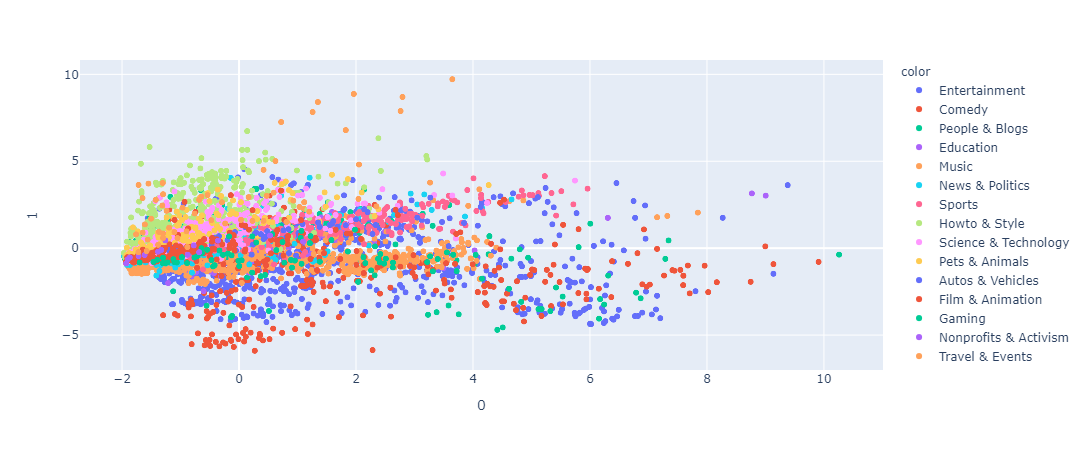

In [129]:
from sklearn import decomposition
import json 
import plotly.express as px

list_of_vecs = df.loc[:, chosen_columns].values

pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(list_of_vecs)

fig = px.scatter(pca_data, x=0, y=1, color=df['category_id'])
fig.show()

### Przygotowanie zbioru z uzupełnionymi dostępnymi category_id

In [133]:
region = 'GB'
dfGB = pd.read_csv(f"./../../our_data/Etap3/{region}_final.csv")
print("Przed: ", df.shape)
dfGB = dfGB.drop(['category_id'], axis=1)

dfGB_known_cats = pd.read_csv(f"../../our_data/Etap4/{region}_videos_with_category.csv")

dfGB = pd.merge(dfGB, dfGB_known_cats, on='video_id', how='left')
dfGB.loc[dfGB.category_id.isna(), "category_id"] = -1

print("Po: ", df.shape)
dfGB[:5]

Przed:  (3235, 139)
Po:  (3235, 139)


video_id  channel_title      views     likes  dislikes  comment_count  \
0  -3VBPAZPTQI            583   209192.0   11119.0     153.0          740.0   
1  -43MBOJnVks           1379   544638.0    7985.0     330.0         1038.0   
2  -5WBCrazSfg           1147   172090.0    4354.0      53.0          587.0   
3  -5aaJJQFvOg           1457   509454.0   82757.0     842.0         4535.0   
4  -7tSTUR7FG0           1085  1092530.0  152536.0     338.0         8272.0   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0                  0                 0                       0   
1                  0                 0                       0   
2                  0                 0                       0   
3                  0                 0                       0   
4                  0                 0                       0   

   pub_day_of_the_week  pub_month  pub_day  pub_hour  tren_day_of_the_week  \
0                  4.0       12.0     29.0      15.0                   6.0   
1                  1.0        2.0     13.0      17.0                   2.0   
2                  0.0       11.0     27.0      19.0                   2.0   
3                  2.0        2.0     21.0      22.0                   5.0   
4                  1.0        2.0     27.0      12.0                   2.0   

   tren_month  tren_day  time_to_trend_in_days  dislikes/likes  likes/views  \
0        12.0      31.0               2.367083        0.013760     0.053152   
1         2.0      14.0               1.291574        0.041327     0.014661   
2        11.0      29.0               2.177199        0.012173     0.025301   
3         2.0      24.0               3.082558        0.010174     0.162443   
4         2.0      28.0               1.499988        0.002216     0.139617   

   dislikes/views  comment_count/views  increase_views  increase_likes  \
0        0.000731             0.003537         68556.0          1441.0   
1        0.000606             0.001906       1213961.0          8203.0   
2        0.000308             0.003411         37411.0           724.0   
3        0.001653             0.008902        114028.0         10694.0   
4        0.000309             0.007571        556260.0         29490.0   

   increase_dislikes  increase_comms  times_in_trend     avg_views  \
0               85.0            58.0            14.0  3.518632e+05   
1              502.0          1144.0             2.0  1.151618e+06   
2               14.0           -48.0            10.0  2.861411e+05   
3              217.0           341.0            34.0  1.345710e+06   
4              134.0          1211.0            15.0  3.179299e+06   

       avg_likes  avg_dislikes     avg_comms  avg_views_increase_per_hour  \
0   14660.642857    279.857143    822.357143                 88375.426861   
1   12086.500000    581.000000   1610.000000                421685.454154   
2    6083.900000     98.300000    629.400000                 79041.922280   
3  142837.823529   2170.441176   6540.735294                165269.889950   
4  220945.133333    780.600000  11003.000000                728358.953387   

   n_of_tags  title_length  title_n_of_words  title_capital_letters  \
0       13.0          48.0               8.0                   39.0   
1       29.0          33.0               6.0                   24.0   
2       30.0          70.0              12.0                    8.0   
3        8.0          44.0               8.0                   10.0   
4       49.0          33.0               7.0                   10.0   

   title_capital_letters_percent  title_small_letters  \
0                       0.812500                  0.0   
1                       0.727273                  0.0   
2                       0.114286                 44.0   
3                       0.227273                 24.0   
4                       0.303030                 11.0   

   title_small_letters_percent  title_punctuation  title_punctuation_percent  \
0          

#### US

In [134]:
region = 'US'
dfUS = pd.read_csv(f"./../../our_data/Etap3/{region}_final.csv")
print("Przed: ", dfUS.shape)

dfUS = dfUS.drop(['category_id'], axis=1)

dfUS_known_cats = pd.read_csv(f"../../our_data/Etap4/{region}_videos_with_category.csv")

dfUS = pd.merge(dfUS, dfUS_known_cats, on='video_id', how='left')
dfUS.loc[dfUS.category_id.isna(), "category_id"] = -1

print("Po: ", df.shape)
dfUS[:5]

Przed:  (6283, 139)
Po:  (3235, 139)


video_id  channel_title      views    likes  dislikes  comment_count  \
0  -0CMnp02rNY           1788   475965.0   6531.0     172.0          271.0   
1  -0NYY8cqdiQ           1788   563746.0   4429.0      54.0           94.0   
2  -1Hm41N0dUs            878  1566807.0  32752.0     393.0         1490.0   
3  -1yT-K3c6YI           1182   129360.0   5214.0     108.0          516.0   
4  -2RVw2_QyxQ           1520    67429.0    438.0      23.0           23.0   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0                  0                 0                       0   
1                  0                 0                       0   
2                  0                 0                       0   
3                  0                 0                       0   
4                  0                 0                       0   

   pub_day_of_the_week  pub_month  pub_day  pub_hour  tren_day_of_the_week  \
0                  0.0        6.0      4.0      13.0                   2.0   
1                  0.0        1.0     29.0      14.0                   3.0   
2                  4.0        4.0     27.0       7.0                   6.0   
3                  1.0       11.0     28.0      18.0                   2.0   
4                  6.0       11.0     12.0       2.0                   1.0   

   tren_month  tren_day  time_to_trend_in_days  dislikes/likes  likes/views  \
0         6.0       6.0               2.458322        0.026336     0.013722   
1         2.0       1.0               3.416204        0.012192     0.007856   
2         4.0      29.0               2.687465        0.011999     0.020904   
3        11.0      29.0               1.228657        0.020713     0.040306   
4        11.0      14.0               2.889560        0.052511     0.006496   

   dislikes/views  comment_count/views  increase_views  increase_likes  \
0        0.000361             0.000569        129541.0          1317.0   
1        0.000096             0.000167             0.0             0.0   
2        0.000251             0.000951        315545.0          5413.0   
3        0.000835             0.003989         68955.0          1736.0   
4        0.000341             0.000341          2357.0            15.0   

   increase_dislikes  increase_comms  times_in_trend     avg_views  \
0               60.0            83.0             6.0  6.891170e+05   
1                0.0             0.0             1.0  5.637460e+05   
2              137.0           -78.0             3.0  1.835892e+06   
3               76.0           219.0             4.0  1.943108e+05   
4                3.0            -4.0             3.0  6.943467e+04   

      avg_likes  avg_dislikes    avg_comms  avg_views_increase_per_hour  \
0   8699.500000    274.333333   369.166667                193613.792909   
1   4429.000000     54.000000    94.000000                165021.189863   
2  37388.333333    501.000000  1462.000000                583005.485859   
3   6826.250000    178.250000   732.000000                105285.655074   
4    450.333333     25.333333    20.666667                 23335.385207   

   n_of_tags  title_length  title_n_of_words  title_capital_letters  \
0       33.0          74.0              11.0                    9.0   
1       33.0          75.0              10.0                    8.0   
2       23.0          53.0               8.0                    7.0   
3        8.0          51.0              10.0                   39.0   
4        3.0          30.0               5.0                    3.0   

   title_capital_letters_percent  title_small_letters  \
0                       0.121622                 53.0   
1                       0.106667                 56.0   
2                       0.132075                 38.0   
3                       0.764706                  0.0   
4                       0.100000                 17.0   

   title_small_letters_percent  title_punctuation  title_punctuation_percent  \
0                     0.71621

### Łączenie GB i US

In [135]:
l1 = dfUS.video_id.values
l2 = dfGB.video_id.values
len(set(l1).intersection(set(l2)))

1009

In [136]:
dfGB_with_cat = dfGB.loc[dfGB.category_id != -1.0, ["video_id", 'category_id']]
dfUS_with_cat = dfUS.loc[dfUS.category_id != -1.0, ["video_id", 'category_id']]

In [137]:
GB_map = dfGB_with_cat.set_index('video_id').to_dict()['category_id']
US_map = dfUS_with_cat.set_index('video_id').to_dict()['category_id']

In [138]:
def fillCats(row, region):
    if region == 'GB':
        mapping = US_map
    elif region == 'US':
        mapping = GB_map
        
    if row.video_id in mapping:
        old = row.category_id
        row.category_id = mapping[row.video_id]
#         if old != row.category_id:
#             print(old, "-->", row.category_id)
    return row

In [139]:
Counter(dfGB.category_id.values).most_common()

[(-1.0, 1919),
 (10.0, 416),
 (24.0, 324),
 (22.0, 109),
 (1.0, 86),
 (23.0, 83),
 (26.0, 71),
 (17.0, 68),
 (20.0, 62),
 (25.0, 42),
 (27.0, 19),
 (15.0, 18),
 (28.0, 12),
 (2.0, 2),
 (29.0, 2),
 (19.0, 2)]

In [140]:
dfGB = dfGB.apply(lambda row: fillCats(row, 'GB'), axis=1)
Counter(dfGB.category_id.values).most_common()

[(-1.0, 1781),
 (10.0, 471),
 (24.0, 344),
 (22.0, 118),
 (1.0, 95),
 (23.0, 93),
 (26.0, 81),
 (17.0, 75),
 (20.0, 64),
 (25.0, 46),
 (15.0, 23),
 (27.0, 20),
 (28.0, 17),
 (19.0, 3),
 (2.0, 2),
 (29.0, 2)]

In [141]:
Counter(dfUS.category_id.values).most_common()

[(-1.0, 4641),
 (24.0, 382),
 (10.0, 241),
 (26.0, 153),
 (23.0, 140),
 (22.0, 136),
 (17.0, 117),
 (25.0, 113),
 (1.0, 94),
 (28.0, 90),
 (27.0, 63),
 (20.0, 39),
 (15.0, 38),
 (19.0, 17),
 (2.0, 14),
 (29.0, 3),
 (43.0, 2)]

In [142]:
dfUS = dfUS.apply(lambda row: fillCats(row, 'US'), axis=1)
Counter(dfUS.category_id.values).most_common()

[(-1.0, 4331),
 (24.0, 460),
 (10.0, 341),
 (26.0, 171),
 (23.0, 168),
 (22.0, 161),
 (17.0, 127),
 (25.0, 121),
 (1.0, 112),
 (28.0, 98),
 (27.0, 69),
 (15.0, 45),
 (20.0, 43),
 (19.0, 17),
 (2.0, 14),
 (29.0, 3),
 (43.0, 2)]

In [143]:
df = pd.concat([dfGB, dfUS]).drop_duplicates(subset='video_id', keep='first')
df[:3]

video_id  channel_title     views    likes  dislikes  comment_count  \
0  -3VBPAZPTQI            583  209192.0  11119.0     153.0          740.0   
1  -43MBOJnVks           1379  544638.0   7985.0     330.0         1038.0   
2  -5WBCrazSfg           1147  172090.0   4354.0      53.0          587.0   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0                  0                 0                       0   
1                  0                 0                       0   
2                  0                 0                       0   

   pub_day_of_the_week  pub_month  pub_day  pub_hour  tren_day_of_the_week  \
0                  4.0       12.0     29.0      15.0                   6.0   
1                  1.0        2.0     13.0      17.0                   2.0   
2                  0.0       11.0     27.0      19.0                   2.0   

   tren_month  tren_day  time_to_trend_in_days  dislikes/likes  likes/views  \
0        12.0      31.0               2.367083        0.013760     0.053152   
1         2.0      14.0               1.291574        0.041327     0.014661   
2        11.0      29.0               2.177199        0.012173     0.025301   

   dislikes/views  comment_count/views  increase_views  increase_likes  \
0        0.000731             0.003537         68556.0          1441.0   
1        0.000606             0.001906       1213961.0          8203.0   
2        0.000308             0.003411         37411.0           724.0   

   increase_dislikes  increase_comms  times_in_trend     avg_views  \
0               85.0            58.0            14.0  3.518632e+05   
1              502.0          1144.0             2.0  1.151618e+06   
2               14.0           -48.0            10.0  2.861411e+05   

      avg_likes  avg_dislikes    avg_comms  avg_views_increase_per_hour  \
0  14660.642857    279.857143   822.357143                 88375.426861   
1  12086.500000    581.000000  1610.000000                421685.454154   
2   6083.900000     98.300000   629.400000                 79041.922280   

   n_of_tags  title_length  title_n_of_words  title_capital_letters  \
0       13.0          48.0               8.0                   39.0   
1       29.0          33.0               6.0                   24.0   
2       30.0          70.0              12.0                    8.0   

   title_capital_letters_percent  title_small_letters  \
0                       0.812500                  0.0   
1                       0.727273                  0.0   
2                       0.114286                 44.0   

   title_small_letters_percent  title_punctuation  title_punctuation_percent  \
0                     0.000000                2.0                   0.041667   
1                     0.000000                3.0                   0.090909   
2                     0.628571                5.0                   0.071429   

   title_n_of_emojis  desc_length  desc_n_of_words  desc_capital_letters  \
0                0.0       4233.0            343.0                 550.0   
1                0.0       2952.0            434.0                 233.0   
2                1.0        565.0             70.0                  70.0   

   desc_capital_letters_percent  desc_small_letters  \
0                      0.129931              2591.0   
1                      0.078930              2104.0   
2                      0.123894               372.0   

   desc_small_letters_percent  desc_punctuation  desc_punctuation_percent  \
0                    0.612095             181.0                  0.131349   
1                    0.712737             143.0                  0.056572   
2                    0.658407              16.0                  0.079646   

   desc_n_of_urls  desc_n_of_emojis  isFacebook  isTwitter  isInstagram  \
0            49.0               0.0           0          1            1   
1             0.0               0.0           0          0            0   
2             4.0           

#### Standaryzacja

In [145]:
columns_not_to_standarize = [
    'channel_title',
    'video_id', 'category_id',
    'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
    'isFacebook', 'isTwitter', 'isInstagram', 
]

df['category_id'] = df['category_id'].map(mapping)

df.loc[:, df.columns.difference(columns_not_to_standarize)] = StandardScaler().fit_transform(df.loc[:, df.columns.difference(columns_not_to_standarize)].values)
df.loc[df.category_id.isna(), 'category_id'] = -1
df[:3]

video_id  channel_title     views     likes  dislikes  comment_count  \
0  -3VBPAZPTQI            583 -0.224259 -0.208833 -0.117877      -0.185284   
1  -43MBOJnVks           1379 -0.107438 -0.236121 -0.101592      -0.169871   
2  -5WBCrazSfg           1147 -0.237179 -0.267737 -0.127078      -0.193198   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0                  0                 0                       0   
1                  0                 0                       0   
2                  0                 0                       0   

   pub_day_of_the_week  pub_month   pub_day  pub_hour  tren_day_of_the_week  \
0             0.744527   1.427587  1.608511  0.259358              1.635887   
1            -0.885871  -0.859143 -0.268968  0.566339             -0.534413   
2            -1.429337   1.198914  1.373826  0.873319             -0.534413   

   tren_month  tren_day  time_to_trend_in_days  dislikes/likes  likes/views  \
0    1.441822  1.843160              -0.115120       -0.158820     0.363249   
1   -0.847156 -0.184528              -0.119524       -0.116639    -0.732350   
2    1.212925  1.604609              -0.115898       -0.161249    -0.429507   

   dislikes/views  comment_count/views  increase_views  increase_likes  \
0       -0.219554            -0.314608       -0.219184       -0.193964   
1       -0.247487            -0.547644        0.872331        0.038548   
2       -0.313807            -0.332664       -0.248864       -0.218618   

   increase_dislikes  increase_comms  times_in_trend  avg_views  avg_likes  \
0          -0.067760       -0.123657        0.789993  -0.203852  -0.211036   
1          -0.008273        0.054431       -0.917954  -0.097242  -0.225669   
2          -0.077889       -0.141039        0.220678  -0.212613  -0.259790   

   avg_dislikes  avg_comms  avg_views_increase_per_hour  n_of_tags  \
0     -0.091413  -0.172257                    -0.285798  -0.529039   
1     -0.080026  -0.145025                     0.090643   0.778376   
2     -0.098278  -0.178929                    -0.296340   0.860089   

   title_length  title_n_of_words  title_capital_letters  \
0     -0.109606         -0.226659               3.484092   
1     -0.865187         -0.787635               1.676944   
2      0.998579          0.895295              -0.250680   

   title_capital_letters_percent  title_small_letters  \
0                       3.407984            -1.898950   
1                       2.924576            -1.898950   
2                      -0.552277             0.967382   

   title_small_letters_percent  title_punctuation  title_punctuation_percent  \
0                    -2.961321          -0.023372                   0.019895   
1                    -2.961321           0.548090                   1.431519   
2                     0.298954           1.691014                   0.873074   

   title_n_of_emojis  desc_length  desc_n_of_words  desc_capital_letters  \
0          -0.098492     3.965685         1.976965              3.420592   
1          -0.098492     2.418268         2.777701              1.037693   
2           5.043056    -0.465170        -0.425241             -0.187583   

   desc_capital_letters_percent  desc_small_letters  \
0                      0.623235            3.614318   
1                     -0.213755            2.716385   
2                      0.524151           -0.477086   

   desc_small_letters_percent  desc_punctuation  desc_punctuation_percent  \
0                   -0.401211          2.429347                  0.911048   
1                    0.399112          1.781863                 -0.570456   
2                   -0.032932         -0.382094                 -0.113303   

   desc_n_of_urls  desc_n_of_emojis  isFacebook  isTwitter  isInstagram  \
0        5.386960          -0.23794           0          1            1   
1       -0.946652          -0.23794           0          0            0   
2       -0.429622          -0.23794           1     

### Uczenie

In [147]:
train = df.loc[df.category_id != -1, :]
train[:3]

video_id  channel_title     views     likes  dislikes  comment_count  \
3  -5aaJJQFvOg           1457 -0.119691  0.414940 -0.054484       0.011002   
4  -7tSTUR7FG0           1085  0.083367  1.022526 -0.100856       0.204289   
5  -8X32zNup1o           1003 -0.118412 -0.249800  0.057489      -0.049306   

   comments_disabled  ratings_disabled  video_error_or_removed  \
3                  0                 0                       0   
4                  0                 0                       0   
5                  0                 0                       0   

   pub_day_of_the_week  pub_month   pub_day  pub_hour  tren_day_of_the_week  \
3            -0.342405  -0.859143  0.669772  1.333789              1.093312   
4            -0.885871  -0.859143  1.373826 -0.201112             -0.534413   
5            -1.429337  -0.173124  0.669772  1.333789             -0.534413   

   tren_month  tren_day  time_to_trend_in_days  dislikes/likes  likes/views  \
3   -0.847156  1.008230              -0.112191       -0.164306     3.474063   
4   -0.847156  1.485333              -0.118670       -0.176484     2.824369   
5   -0.160463  0.888954              -0.116319        0.311314    -0.793868   

   dislikes/views  comment_count/views  increase_views  increase_likes  \
3       -0.014454             0.451566       -0.175852        0.124202   
4       -0.313496             0.261564        0.245574        0.770506   
5        0.510871             0.117908       -0.119896       -0.197746   

   increase_dislikes  increase_comms  times_in_trend  avg_views  avg_likes  \
3           -0.04893       -0.077249        3.636571  -0.071369   0.517584   
4           -0.06077        0.065418        0.932322   0.173054   0.961583   
5            0.00371        0.023274        0.078349  -0.160528  -0.250649   

   avg_dislikes  avg_comms  avg_views_increase_per_hour  n_of_tags  \
3     -0.019924   0.025451                    -0.198953  -0.937606   
4     -0.072478   0.179730                     0.437001   2.412643   
5     -0.003686  -0.053442                    -0.106214  -0.365612   

   title_length  title_n_of_words  title_capital_letters  \
3     -0.311094         -0.226659              -0.009727   
4     -0.865187         -0.507147              -0.009727   
5     -0.462210         -0.507147              -0.612110   

   title_capital_letters_percent  title_small_letters  \
3                       0.088584            -0.335496   
4                       0.518279            -1.182367   
5                      -0.508799            -0.335496   

   title_small_letters_percent  title_punctuation  title_punctuation_percent  \
3                    -0.132156           0.548090                   0.780000   
4                    -1.232387          -0.023372                   0.562827   
5                     0.074856          -0.023372                   0.223826   

   title_n_of_emojis  desc_length  desc_n_of_words  desc_capital_letters  \
3          -0.098492    -0.240486        -0.583628             -0.074828   
4          -0.098492    -0.747836        -0.830008             -0.458196   
5          -0.098492    -0.721261        -0.662822             -0.503298   

   desc_capital_letters_percent  desc_small_letters  \
3                      0.348367           -0.213422   
4                      0.176653           -0.772095   
5                     -0.207345           -0.766563   

   desc_small_letters_percent  desc_punctuation  desc_punctuation_percent  \
3                    0.184523         -0.433211                  0.841322   
4                   -0.175464         -0.552484                  1.361373   
5                   -0.425309         -0.228742                  0.048616   

   desc_n_of_urls  desc_n_of_emojis  isFacebook  isTwitter  isInstagram  \
3        0.604437          -0.23794           1          1            0   
4       -0.171108          -0.23794           1          1            1   
5       -0.817395          -0.23794           0     

In [ ]:
# define model
model = LogisticRegression()
# fit model on labeled dataset
model.fit(X_train_lab, y_train_lab)

In [148]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.semi_supervised import LabelPropagation

clf = make_pipeline(StandardScaler(), LabelPropagation(n_jobs=-1))
cross_val_score(clf, df.iloc[:, 1:-1].fillna(-1), df.category_id.values, cv=2)

/home/lilatee/.local/lib/python3.8/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/lilatee/.local/lib/python3.8/site-packages/sklearn/semi_supervised/_label_propagation.py:290: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(
/home/lilatee/.local/lib/python3.8/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/lilatee/.local/lib/python3.8/site-packages/sklearn/semi_supervised/_label_propagation.py:290: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


array([0.02657602, 0.02659246])

In [141]:
df.loc[:, 'TFIDF_title_clean_24':'TFIDF_title_clean_19']

TFIDF_title_clean_24  TFIDF_title_clean_17  TFIDF_title_clean_10  \
0                 0.000000              0.070003              0.018103   
1                 0.130361              0.596597              0.000000   
2                 0.000000              0.007529              0.000000   
3                 0.000000              0.249362              0.000000   
4                 0.000000              0.067987              0.000000   
...                    ...                   ...                   ...   
3230              0.000000              0.103017              0.000000   
3231              0.109707              0.598818              0.038606   
3232              0.000000              0.062134              0.027383   
3233              0.000000              0.011413              0.029694   
3234              0.000000              0.047341              0.000000   

      TFIDF_title_clean_20  TFIDF_title_clean_26  TFIDF_title_clean_1  \
0                 0.044056              0.000000             0.150150   
1                 0.046144              0.000000             0.400613   
2                 0.143306              0.000000             0.012416   
3                 0.000000              0.000000             0.013464   
4                 0.000000              0.000000             0.000000   
...                    ...                   ...                  ...   
3230              0.009356              0.000000             0.000000   
3231              0.079561              0.065386             0.428296   
3232              0.000000              0.000000             0.000000   
3233              0.214484              0.000000             0.009344   
3234              0.040883              0.000000             0.057535   

      TFIDF_title_clean_25  TFIDF_title_clean_23  TFIDF_title_clean_27  \
0                 0.291142              0.119269              0.161162   
1                 0.196757              0.000000              0.797182   
2                 0.027356              0.000000              0.038578   
3                 0.109581              0.035088              0.059158   
4                 0.017145              0.038346              0.016191   
...                    ...                   ...                   ...   
3230              0.014232              0.015915              0.043869   
3231              0.248394              0.000000              0.664740   
3232              0.084282              0.120068              0.136947   
3233              0.113898              0.116901              0.091138   
3234              0.145863              0.055353              0.162486   

      TFIDF_title_clean_15  TFIDF_title_clean_28  TFIDF_title_clean_2  \
0                 0.136377              0.501941             0.034668   
1                 0.014154              0.000000             0.045224   
2                 0.016558              0.012125             0.000000   
3                 0.000000              0.013148             0.000000   
4                 0.019948              0.000000             0.068503   
...                    ...                   ...                  ...   
3230              0.018082              0.013148             0.000000   
3231              0.024918              0.000000             0.082189   
3232              0.033117              0.037398             0.000000   
3233              0.024660              0.022273             0.000000   
3234              0.065845              0.000000             0.045224   

      TFIDF_title_clean_29  TFIDF_title_clean_19  
0                 0.087795                   0.0  
1                 0.000000                   0.0  
2                 0.000000                   0.0  
3                 0.000000                   0.0  
4                 0.000000                   0.0  
...                    ...                   ...  
3230              0.000000                   0.0  
3231              0.064799                   0.0  
3232           